# Credit Score Classification Model Development

#### Create a predictive model that categorizes customers into three creditworthiness levels: Good, Standard, and Poor. This model will be a valuable tool for banks and financial institutions to make informed decisions about loan approvals and risk assessment.

#### The primary objective of developing a credit score classification model is to accurately predict the creditworthiness of individuals based on their financial and personal data. This prediction helps financial institutions, lenders, and credit bureaus to make informed decisions about extending credit, setting interest rates, and managing credit risk.

## Import Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn import over_sampling
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle
import bz2file as bz2
import warnings
warnings.filterwarnings("ignore")

## Load & read the data

In [51]:
df = pd.read_csv(r"C:\Users\HP\Desktop\ICTAK\credit.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [52]:
# Sum of the unique values in each features

df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

In [53]:
# Basic information about the data

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

(100000, 28)

In [54]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

This data contains 28 columns 1 lakh rows. And it contain 3 different data types. And also we displayed the names of columns.

In [55]:
# Statistical information about the data

df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


From the above table, we can understand the mean, standard deviation, minimum and maximum values,quartile deviations of each columns.

## Exploratory Data Analysis (EDA)

In [56]:
categorical = df.select_dtypes(include='object')
numerical = df.select_dtypes(include=['float64', 'int64'])

* Categorical Data

In [57]:
categorical.describe().T

,count,unique,top,freq
Name,100000,10128,Jessicad,48
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28616
Credit_Score,100000,3,Standard,53174


Generates and displays descriptive statistics for the categorical variables in the DataFrame df, with each variable name displayed as a row and the statistics displayed as columns.

In [58]:
for col in categorical:
    cats = df[col].value_counts().rename_axis(col).reset_index(name='Counts')
    display(cats)
    print('\n-----------------------')

,Name,Counts
0,Jessicad,48
1,Langep,48
2,Stevex,48
3,Vaughanl,40
4,Ronald Groverk,40
...,...,...
10123,Breidthardtj,8
10124,Sven Egenterx,8
10125,Antonella Ciancioc,8
10126,Valentina Zan,8



-----------------------


,Occupation,Counts
0,Lawyer,7096
1,Engineer,6864
2,Architect,6824
3,Mechanic,6776
4,Scientist,6744
5,Accountant,6744
6,Developer,6720
7,Media_Manager,6720
8,Teacher,6672
9,Entrepreneur,6648



-----------------------


,Type_of_Loan,Counts
0,No Data,11408
1,Not Specified,1408
2,Credit-Builder Loan,1280
3,Personal Loan,1272
4,Debt Consolidation Loan,1264
...,...,...
6256,"Not Specified, Mortgage Loan, Auto Loan, and P...",8
6257,"Payday Loan, Mortgage Loan, Debt Consolidation...",8
6258,"Debt Consolidation Loan, Auto Loan, Personal L...",8
6259,"Student Loan, Auto Loan, Student Loan, Credit-...",8



-----------------------


,Credit_Mix,Counts
0,Standard,45848
1,Good,30384
2,Bad,23768



-----------------------


,Payment_of_Min_Amount,Counts
0,Yes,52326
1,No,35667
2,NM,12007



-----------------------


,Payment_Behaviour,Counts
0,Low_spent_Small_value_payments,28616
1,High_spent_Medium_value_payments,19738
2,High_spent_Large_value_payments,14726
3,Low_spent_Medium_value_payments,14399
4,High_spent_Small_value_payments,11764
5,Low_spent_Large_value_payments,10757



-----------------------


,Credit_Score,Counts
0,Standard,53174
1,Poor,28998
2,Good,17828



-----------------------


This code iterates over each categorical variable, calculates the value counts for each category within that variable, and displays the counts in a tabular format.

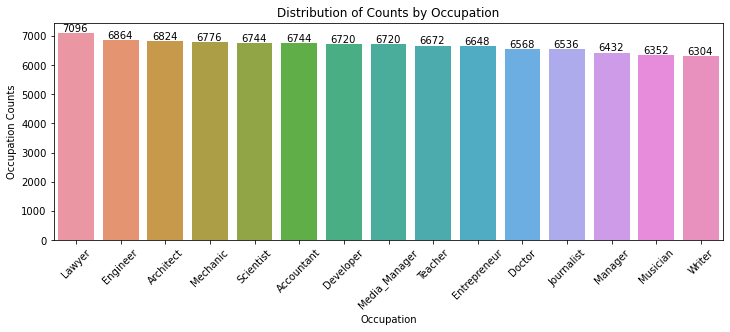

In [59]:
# Occupation
plt.figure(figsize=(12,4))
ax = sns.countplot(x='Occupation',data = categorical, order = df['Occupation'].value_counts().index)
plt.title('Distribution of Counts by Occupation')
plt.xlabel('Occupation')
plt.xticks(rotation=45)
plt.ylabel('Occupation Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+50))

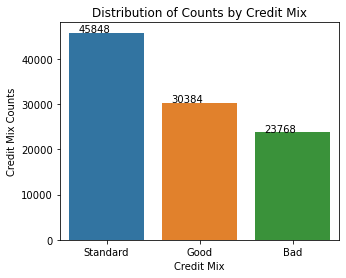

In [60]:
# Credit_Mix
plt.figure(figsize=(5,4))
ax = sns.countplot(x ='Credit_Mix',data = categorical, order = df['Credit_Mix'].value_counts().index)
plt.title('Distribution of Counts by Credit Mix')
plt.xlabel('Credit Mix')
plt.ylabel('Credit Mix Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+50))

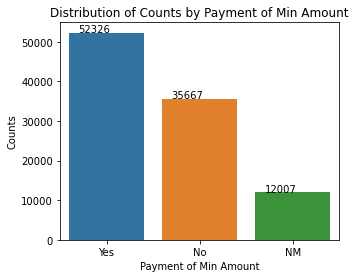

In [61]:
# Payment_of_Min_Amount
plt.figure(figsize=(5,4))
ax = sns.countplot(x='Payment_of_Min_Amount',data = categorical, order = df['Payment_of_Min_Amount'].value_counts().index)
plt.title('Distribution of Counts by Payment of Min Amount')
plt.xlabel('Payment of Min Amount')
plt.ylabel('Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+50))

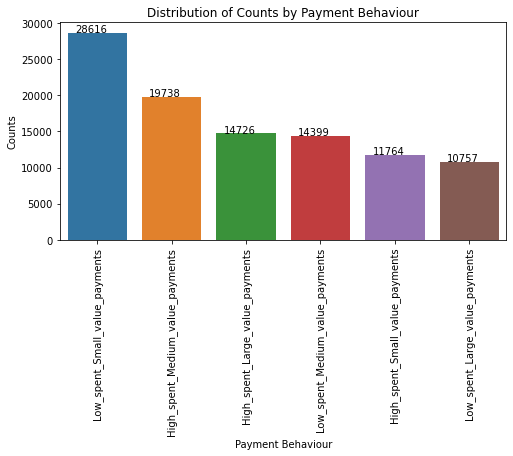

In [62]:
# Payment_Behaviour
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Payment_Behaviour',data = categorical, order = df['Payment_Behaviour'].value_counts().index)
plt.title('Distribution of Counts by Payment Behaviour')
plt.xlabel('Payment Behaviour')
plt.xticks(rotation=90)
plt.ylabel('Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+50))

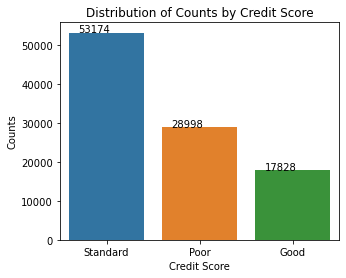

In [63]:
# Credit_Score
plt.figure(figsize=(5,4))
ax = sns.countplot(x='Credit_Score',data = categorical, order = df['Credit_Score'].value_counts().index)
plt.title('Distribution of Counts by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+50))

<AxesSubplot:xlabel='Occupation', ylabel='count'>

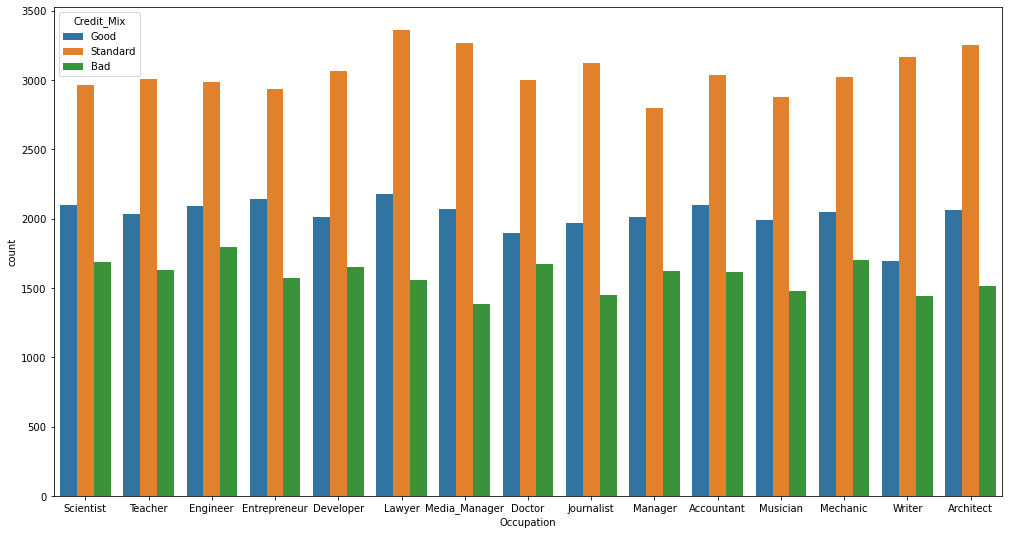

In [64]:
fig=plt.figure(figsize=(17,9))
sns.countplot(data=categorical,x="Occupation",hue="Credit_Mix")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

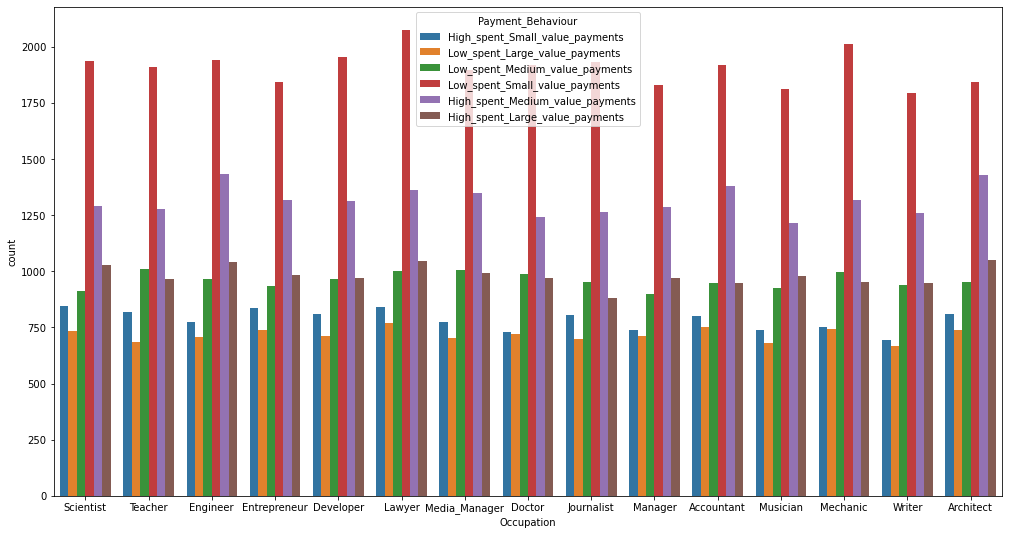

In [65]:
fig=plt.figure(figsize=(17,9))
sns.countplot(data=categorical,x="Occupation",hue="Payment_Behaviour")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

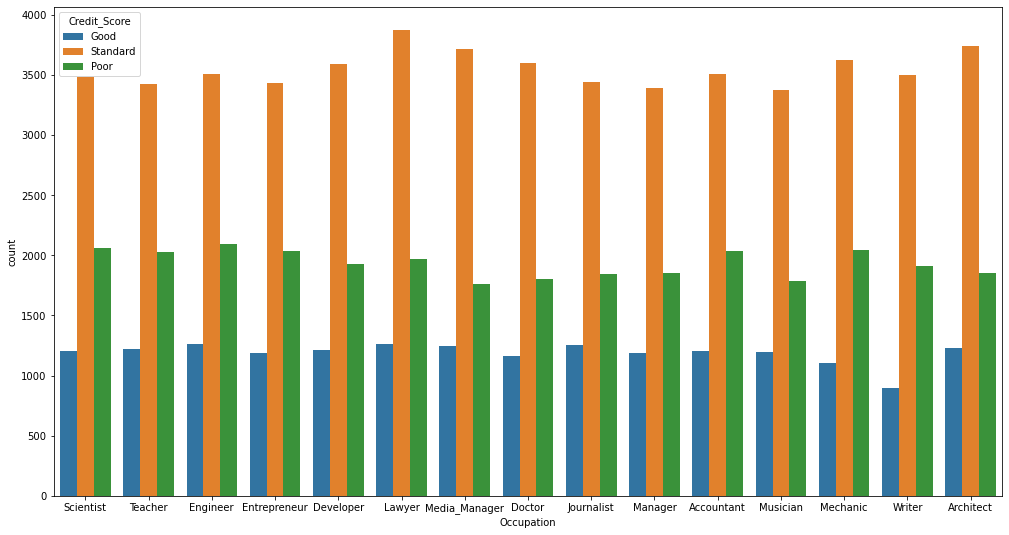

In [66]:
fig=plt.figure(figsize=(17,9))
sns.countplot(data=categorical,x="Occupation",hue="Credit_Score")

<AxesSubplot:xlabel='Credit_Mix', ylabel='count'>

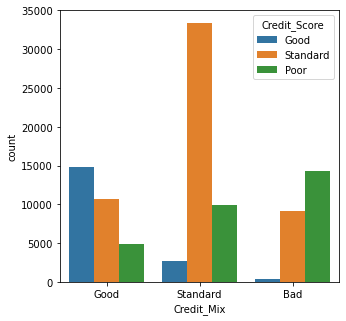

In [67]:
fig=plt.figure(figsize=(5,5))
sns.countplot(data=categorical,x="Credit_Mix",hue="Credit_Score")

In categorical data, we analyzed univariate and bivariate analysis of features. Which gives a view about the data and features.

* Numerical Data

In [68]:
numerical.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


Generates and displays descriptive statistics for the numerical variables in the DataFrame df, with each variable name displayed as a row and the statistics displayed as columns.

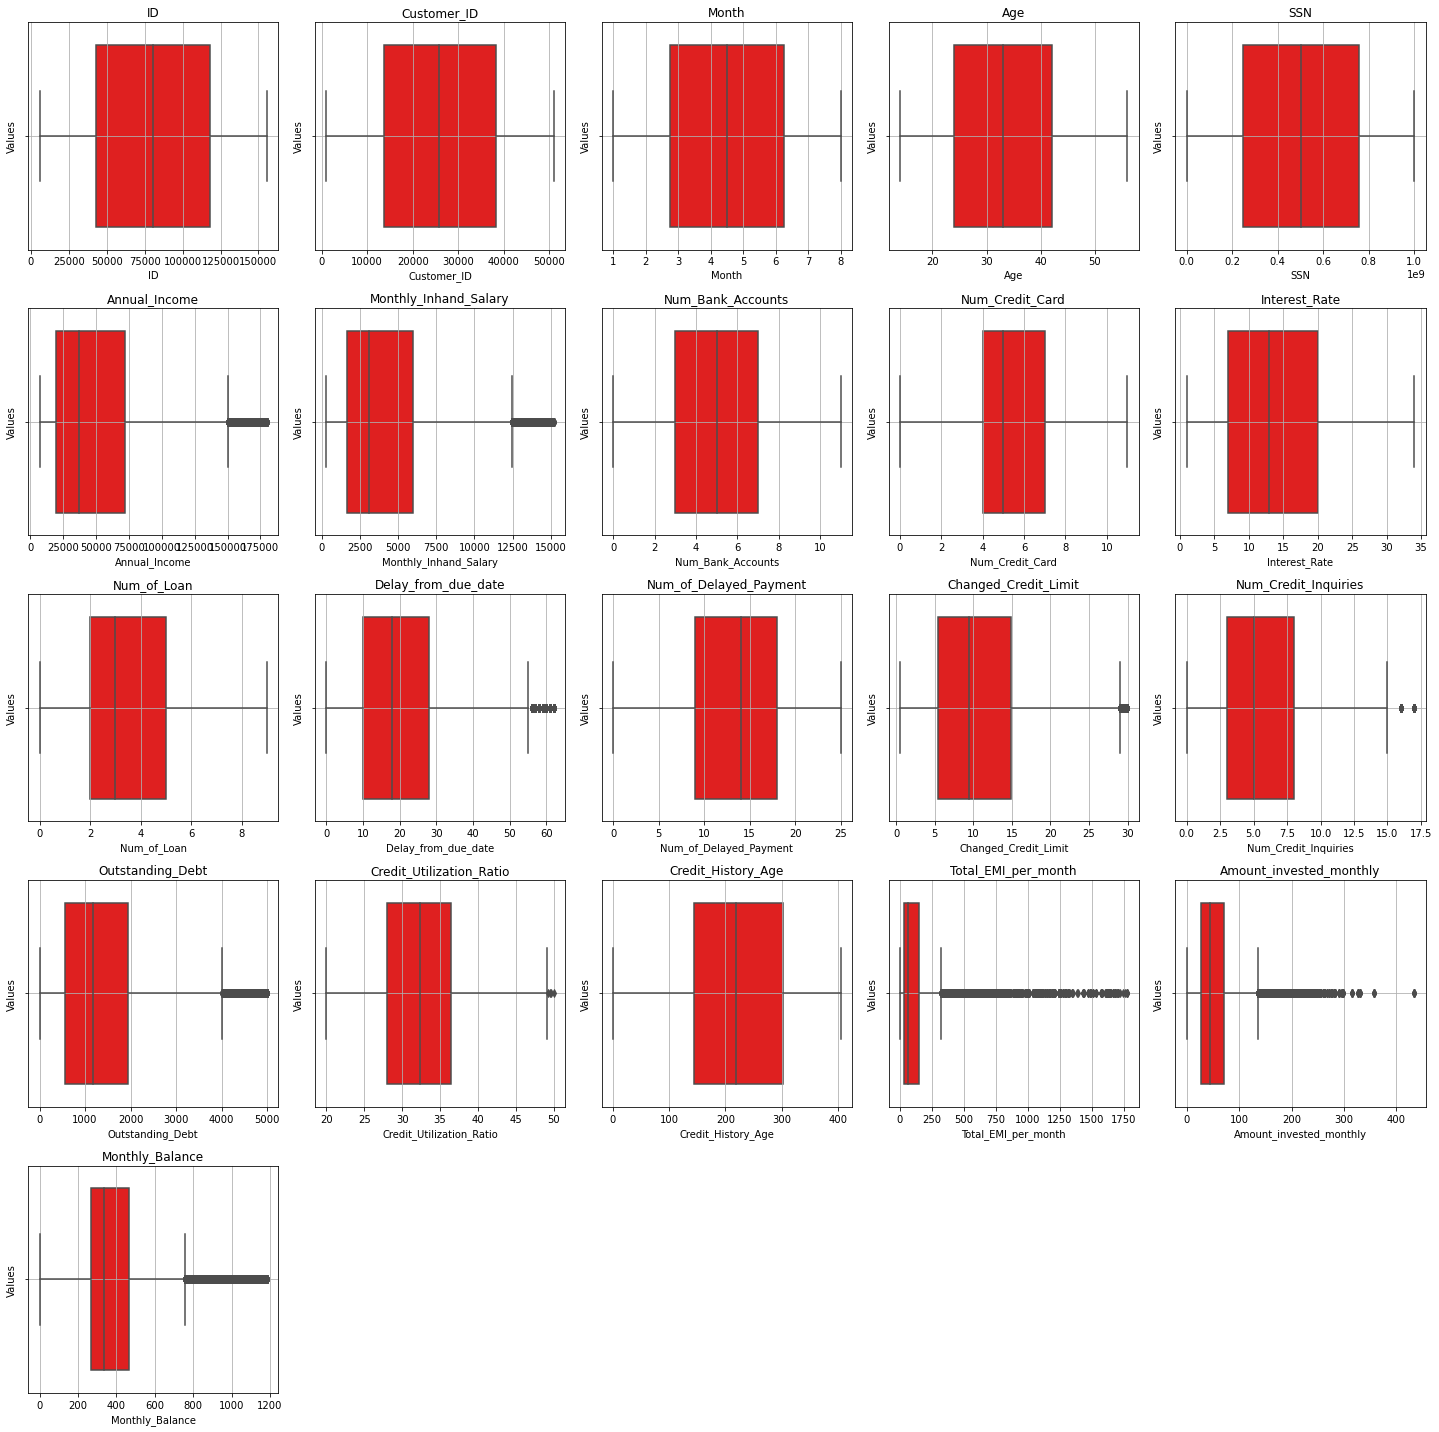

In [69]:
# Plot box plots for each numerical column

plt.figure(figsize=(20,20))
for i, col in enumerate(numerical):
    plt.subplot(5, 5, i + 1)  
    sns.boxplot(df[col],color='red')
    plt.title(f'{col}')
    plt.ylabel('Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

This code creates a figure with multiple subplots, each containing a boxplot for a numerical variable from the DataFrame df and there are quite a lot of outliers in some of the variables.

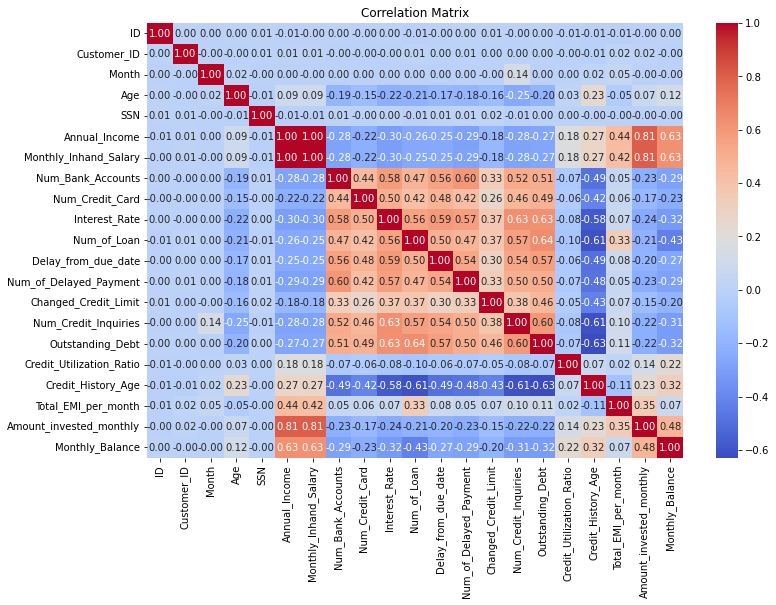

In [70]:
# Correlation Matrix of numerical data

corr = df.select_dtypes(include=['int64', 'float64']).corr()
corr
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Possitive Correlation :

* Annual_Income and Monthly_Inhand_Salary have a perfect possitive correlation of 1.00
* Amount_invested_monthly have a possitive correlation of 0.81 with both Annual_Income and Monthly_Inhand_Salary

#### Negative Correlation :

* Credit_History_Age have the most negative correlation with other variable.
* -0.63 with Outstanding_Debt and -0.61 with both Num_Credit_Inquiries & Num_of_Loan.

Many variables shows no correlation with each other, meaning that there may be no linear relationship or that any relationship is complex and not easily captured by correlation alone. Here Annual Income and Monthly Inhand salary have highest possitive correlation 1.00. so we can drop one of the variable in feature engineering.

## Data Preprocessing

### Data Cleaning

* Finding Missing Values

In [71]:
df.isna().sum().reset_index().rename(columns={'index':'feature_name',0:'null_counts'})

,feature_name,null_counts
0,ID,0
1,Customer_ID,0
2,Month,0
3,Name,0
4,Age,0
5,SSN,0
6,Occupation,0
7,Annual_Income,0
8,Monthly_Inhand_Salary,0
9,Num_Bank_Accounts,0


There is no missing values.

* Finding Duplicates

In [72]:
df.duplicated().value_counts()

False    100000
dtype: int64

No duplicates in the data.

### Feature Engineering

* Feature Selection

In [73]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

We can drop some features according to our univariate,bivariate,multivariate analysis. In correlation matrix we found that 'Annual_Income' and 'Monthly_Inhand_Salary' have a possitive relation of 1.00, it means they contain redundant information. This redundancy can be eliminated by dropping one of the two features.

In [74]:
# Drop irrelevant features

features_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN','Annual_Income','Type_of_Loan']
df = df.drop(columns=features_to_drop)

In [75]:
df.shape

(100000, 21)

### Feature Encoding

* One Hot Encoding

In [76]:
df = pd.get_dummies(df, columns=['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'], 
                            drop_first=True)

* Label Encoding

In [77]:
le = LabelEncoder()
df['Credit_Score']=le.fit_transform(df['Credit_Score'])

In [78]:
df.head()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,...,0,1,0,1,0,0,1,0,0,0
1,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,...,0,1,0,1,0,0,0,1,0,0
2,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,...,0,1,0,1,0,0,0,0,1,0
3,23.0,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,...,0,1,0,1,0,0,0,0,0,1
4,23.0,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,...,0,1,0,1,0,1,0,0,0,0


In [79]:
df.columns


Index(['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Paym

In [80]:
df.shape

(100000, 40)

### Feature Transformation

In [81]:
column = ['Age','Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Total_EMI_per_month',
       'Amount_invested_monthly','Monthly_Balance']
for col in column:
    df[col] = StandardScaler().fit_transform(df[col].values.reshape(len(df),1))

### Train Test Split Data

In [82]:
X = df[column]
y = df['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Balancing the data

In [83]:
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(75000, 13)
(75000,)
2    39909
1    21685
0    13406
Name: Credit_Score, dtype: int64


In [84]:
X_train, y_train = over_sampling.SMOTE(random_state=42).fit_resample(X_train, y_train)

After oversampling, the training data will have balanced class distributions, which can help improve the performance of machine learning models. By generating synthetic samples for the minority class, SMOTE aims to balance the class distribution, which can lead to more robust and accurate models, especially for classification tasks.

In [85]:
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(119727, 13)
(119727,)
2    39909
1    39909
0    39909
Name: Credit_Score, dtype: int64


## Model Selection

* Logistic Regression Model

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Accuracy: 0.60356
Confusion Matrix:
[[3449  152  821]
 [1057 4924 1332]
 [3452 3097 6716]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.78      0.56      4422
           1       0.60      0.67      0.64      7313
           2       0.76      0.51      0.61     13265

    accuracy                           0.60     25000
   macro avg       0.60      0.65      0.60     25000
weighted avg       0.65      0.60      0.61     25000

Cross-validation scores: [0.65163284 0.65902447 0.65688035 0.66051368 0.65821675]
Mean CV accuracy: 0.6572536173955958


* Decision Tree Model

In [38]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Accuracy: 0.73128
Confusion Matrix:
[[2994  108 1320]
 [ 126 5412 1775]
 [1506 1883 9876]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.68      0.66      4422
           1       0.73      0.74      0.74      7313
           2       0.76      0.74      0.75     13265

    accuracy                           0.73     25000
   macro avg       0.71      0.72      0.72     25000
weighted avg       0.73      0.73      0.73     25000

Cross-validation scores: [0.75787188 0.77353211 0.81382335 0.84126122 0.84042598]
Mean CV accuracy: 0.805382907463


* Random Forest Model

In [39]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Accuracy: 0.79448
Confusion Matrix:
[[ 3421    25   976]
 [   47  6046  1220]
 [ 1181  1689 10395]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      4422
           1       0.78      0.83      0.80      7313
           2       0.83      0.78      0.80     13265

    accuracy                           0.79     25000
   macro avg       0.78      0.79      0.79     25000
weighted avg       0.80      0.79      0.79     25000

Cross-validation scores: [0.83270692 0.85024639 0.87655043 0.89868449 0.89242013]
Mean CV accuracy: 0.8701216708848476


* K - Nearest Neigbors (KNN) Model

In [40]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Accuracy: 0.76724
Confusion Matrix:
[[3837   43  542]
 [ 148 6346  819]
 [2123 2144 8998]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.87      0.73      4422
           1       0.74      0.87      0.80      7313
           2       0.87      0.68      0.76     13265

    accuracy                           0.77     25000
   macro avg       0.75      0.80      0.76     25000
weighted avg       0.79      0.77      0.77     25000

Cross-validation scores: [0.83350038 0.83659066 0.84819378 0.86727918 0.86347881]
Mean CV accuracy: 0.849808560525887


### Hyperparameter Tunning

In [41]:
# Logistic Regression

# Define the hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

# Create the GridSearchCV object
model=LogisticRegression()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'C': 0.01, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}


In [42]:
# Create a decision tree model
model = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}


In [ ]:
# Define the model
rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,  n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)

In [86]:
# Define the model
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform the grid search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1,  scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


## Accuracy after tunning

In [38]:
# Logistic Regression model

log_reg = LogisticRegression(C= 0.01, max_iter= 200, penalty= 'l1', solver='saga')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Accuracy: 0.60328
Confusion Matrix:
[[3453  149  820]
 [1064 4932 1317]
 [3471 3097 6697]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.78      0.56      4422
           1       0.60      0.67      0.64      7313
           2       0.76      0.50      0.61     13265

    accuracy                           0.60     25000
   macro avg       0.60      0.65      0.60     25000
weighted avg       0.66      0.60      0.61     25000

Cross-validation scores: [0.6518834  0.66011025 0.65779912 0.66047191 0.65875966]
Mean CV accuracy: 0.6578048695456055


In [39]:
#  Decision Tree model

dt_classifier = DecisionTreeClassifier(criterion= 'entropy', max_depth= 30, max_features= None,
                                       min_samples_leaf=1, min_samples_split= 5, splitter= 'random')
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Accuracy: 0.7422
Confusion Matrix:
[[3250  116 1056]
 [ 167 5779 1367]
 [1696 2043 9526]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      4422
           1       0.73      0.79      0.76      7313
           2       0.80      0.72      0.76     13265

    accuracy                           0.74     25000
   macro avg       0.72      0.75      0.73     25000
weighted avg       0.75      0.74      0.74     25000

Cross-validation scores: [0.7833041  0.7923244  0.81766548 0.82810608 0.8275214 ]
Mean CV accuracy: 0.8097842920985805


In [41]:
# KNN model

knn_classifier = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 3, weights= 'distance')  
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Accuracy: 0.79336
Confusion Matrix:
[[ 3527     9   886]
 [    7  6058  1248]
 [ 1284  1732 10249]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76      4422
           1       0.78      0.83      0.80      7313
           2       0.83      0.77      0.80     13265

    accuracy                           0.79     25000
   macro avg       0.78      0.80      0.79     25000
weighted avg       0.80      0.79      0.79     25000

Cross-validation scores: [0.85329491 0.86114591 0.87972437 0.90536646 0.9011067 ]
Mean CV accuracy: 0.8801276722420113


In [100]:
# Random Forest model

rf_classifier = RandomForestClassifier(bootstrap= False, max_depth= None, min_samples_leaf= 1,
                                       min_samples_split= 2, n_estimators= 200)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Accuracy: 0.78736
Confusion Matrix:
[[ 3308    20  1094]
 [   31  5848  1434]
 [ 1137  1600 10528]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      4422
           1       0.78      0.80      0.79      7313
           2       0.81      0.79      0.80     13265

    accuracy                           0.79     25000
   macro avg       0.78      0.78      0.78     25000
weighted avg       0.79      0.79      0.79     25000

Cross-validation scores: [0.82285142 0.84289652 0.87659219 0.90578409 0.9007726 ]
Mean CV accuracy: 0.8697793631410912


## Model Evaluation

In [114]:
# Initialize the KNN model with the best parameters found
final_knn_model = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 3, weights= 'distance') 

# Train the model
final_knn_model.fit(X_train, y_train)

# Save the final model

with bz2.BZ2File('model.pkl', 'wb') as file:
    pickle.dump(final_knn_model, file)